##🎯 What You’ll Learn in This Video

✅ Calculate SAVI using Sentinel-2 and Landsat8 with eemont

✅ Visualize SAVI in interactive maps with geemap

###What is SAVI (Soil Adjusted Vegetation Index) ?
- هو مؤشر نباتي مصمم لتقليل تأثير انعكاس التربة الخلفية على قيم المؤشر، خاصة في المناطق التي يكون فيها الغطاء النباتي منخفضًا أو متفرقًا، مثل المناطق القاحلة وشبه القاحلة
- تقدير كثافة وحيوية الغطاء النباتي مع تصحيح أثر الانعكاس الطيفي للتربة الخلفية الذي يشوه القياس

- يُفضل استخدامه في المناطق التي يكون فيها الغطاء النباتي منخفضًا أو متفرقًا (أقل من 40%)، مثل المناطق القاحلة أو في المراحل المبكرة من نمو المحاصيل حيث تكون التربة مكشوفة بشكل كبير

- يعتمد على إدخال عامل تصحيح التربة (
L
) في المعادلة لتقليل تأثير انعكاس التربة.

###**المعادلة**
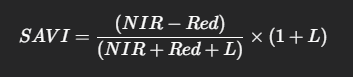
###**مكونات المعادلة**

NIR: Reflectance in the Near-Infrared band.

Red: Reflectance in the Red band.

L: Soil Adjustment Factor, a constant value between 0 and 1.

 القيم القريبة من
+1
: تشير إلى غطاء نباتي كثيف وصحي

القيم القريبة من
0
: تشير إلى تربة مكشوفة أو غطاء نباتي قليل جداً، مع الأخذ في الاعتبار تصحيح الانعكاس.

In [ ]:
!pip install eemont

In [ ]:
import ee
import geemap
import eemont

In [ ]:
# Authenticate and initialize Earth Engine
ee.Authenticate()

ee.Initialize(project = 'ee-nouribrahim25')

In [ ]:
coors = [[30.305788, 30.178518],
    [30.305788, 30.237858],
    [30.419943, 30.237858],
    [30.419943, 30.178518],
    [30.305788, 30.178518]]

In [ ]:
aoi = ee.Geometry.Polygon(coors)
aoi

In [ ]:
#Date Range
start_date = '2025-01-01'
end_date   = '2025-04-01'

In [ ]:
# Sentinel-2 with eemont
sen2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
      .filterBounds(aoi)
      .filterDate(start_date , end_date)
      .maskClouds()                             # Cloud/shadow masking
      .scaleAndOffset()                         # Apply scale/offset
      .spectralIndices("SAVI")                  # Calculate the index
      .mean()
      .clip(aoi)
)

In [ ]:
# Landsat 8 with eemont
land8 = (
    ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
    .filterDate(start_date, end_date)
    .filterBounds(aoi)
    .maskClouds()
    .scaleAndOffset()
    .spectralIndices('SAVI')
    .mean()
    .clip(aoi)
)


In [ ]:
# visulization parameters
vis_savi = {'min': 0.0, 'max': 0.8, 'palette': ['brown', 'yellow', 'green']}


In [ ]:
Map = geemap.Map(width = 800)
Map.centerObject(aoi, 10)

In [ ]:
# Sentinel-2 layer
Map.addLayer(sen2.select('SAVI'), vis_savi, 'SAVI Sentinel-2')
# Landsat 8 layer
Map.addLayer(land8.select('SAVI'), vis_savi, 'SAVI Landsat 8')

Map